## 获取地理编码

In [45]:
import pandas as pd
import requests
from pandas.io.json import json_normalize
key_li ="c9bf0947fe23ac783fca0048cb0302b7"

def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_li,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

杨梅镇山口村 = geocode(address='广东省茂名市化州市杨梅镇山口村')
print(杨梅镇山口村)
df_杨梅镇山口村地理编码 = pd.io.json.json_normalize(杨梅镇山口村['geocodes'])
display(df_杨梅镇山口村地理编码)
杨梅镇山口村地理编码 = 杨梅镇山口村['geocodes'][0]['location']
print("杨梅镇山口村地理编码:",杨梅镇山口村地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省茂名市化州市山口村', 'country': '中国', 'province': '广东省', 'citycode': '0668', 'city': '茂名市', 'district': '化州市', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440982', 'street': [], 'number': [], 'location': '110.654255,21.509419', 'level': '村庄'}]}


,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,440982,[],[],茂名市,0668,中国,化州市,广东省茂名市化州市山口村,村庄,"110.654255,21.509419",[],[],[],广东省,[],[]


杨梅镇山口村地理编码: 110.654255,21.509419


### 逆地理编码

In [47]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_li,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

杨梅镇山口村逆地理编码_base = regeocode(杨梅镇山口村地理编码)
print(杨梅镇山口村逆地理编码)
df_杨梅镇山口村逆地理编码 = pd.io.json.json_normalize(杨梅镇山口村逆地理编码).T
display(df_杨梅镇山口村逆地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省茂名市化州市山口村', 'country': '中国', 'province': '广东省', 'citycode': '0668', 'city': '茂名市', 'district': '化州市', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440982', 'street': [], 'number': [], 'location': '110.654255,21.509419', 'level': '村庄'}]}


,0
count,1
geocodes,"[{'formatted_address': '广东省茂名市化州市山口村', 'countr..."
info,OK
infocode,10000
status,1


In [49]:
# Extra 全部逆地理编码分析
杨梅镇山口村逆地理编码_all = regeocode(杨梅镇山口村地理编码,extensions="all")
print(杨梅镇山口村逆地理编码_all)
df_杨梅镇山口村逆地理编码_all = pd.io.json.json_normalize(杨梅镇山口村逆地理编码_all)
display(df_杨梅镇山口村逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0668F49F030022617', 'location': '110.653,21.5107', 'direction': '东南', 'name': '525乡道', 'distance': '220.83'}], 'roadinters': [], 'formatted_address': '广东省茂名市化州市杨梅镇山口村', 'addressComponent': {'city': '茂名市', 'province': '广东省', 'adcode': '440982', 'district': '化州市', 'towncode': '440982102000', 'streetNumber': {'number': [], 'direction': [], 'distance': [], 'street': []}, 'country': '中国', 'township': '杨梅镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0668'}, 'aois': [], 'pois': [{'id': 'B0FFI8KATQ', 'direction': 'Center', 'businessarea': [], 'address': '化州市', 'poiweight': '0.202478', 'name': '山口村', 'location': '110.654255,21.509419', 'distance': '0', 'tel': [], 'type': '地名地址信息;普通地名;村庄级地名'}, {'id': 'B029C01ZFK', 'direction': '西北', 'businessarea': [], 'address': '化州市', 'poiweight': '0.12244', 'name': '塘里山', 'location': '110.650981,21.511779', 'distance': '428.472', 'tel': []

,info,infocode,regeocode.addressComponent.adcode,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.businessAreas,regeocode.addressComponent.city,regeocode.addressComponent.citycode,regeocode.addressComponent.country,regeocode.addressComponent.district,...,regeocode.addressComponent.streetNumber.number,regeocode.addressComponent.streetNumber.street,regeocode.addressComponent.towncode,regeocode.addressComponent.township,regeocode.aois,regeocode.formatted_address,regeocode.pois,regeocode.roadinters,regeocode.roads,status
0,OK,10000,440982,[],[],[[]],茂名市,0668,中国,化州市,...,[],[],440982102000,杨梅镇,[],广东省茂名市化州市杨梅镇山口村,"[{'id': 'B0FFI8KATQ', 'direction': 'Center', '...",[],"[{'id': '0668F49F030022617', 'location': '110....",1


In [51]:
# 分析细节
roads = pd.io.json.json_normalize(杨梅镇山口村逆地理编码_all['regeocode']['roads'])
roadinters = pd.io.json.json_normalize(杨梅镇山口村逆地理编码_all['regeocode']['roadinters'])
aois = pd.io.json.json_normalize(杨梅镇山口村逆地理编码_all['regeocode']['aois'])
pois = pd.io.json.json_normalize(杨梅镇山口村逆地理编码_all['regeocode']['pois'])
display(roads,roadinters,aois,pois)

,direction,distance,id,location,name
0,东南,220.83,0668F49F030022617,"110.653,21.5107",525乡道


""


""


,address,businessarea,direction,distance,id,location,name,poiweight,tel,type
0,化州市,[],Center,0,B0FFI8KATQ,"110.654255,21.509419",山口村,0.202478,[],地名地址信息;普通地名;村庄级地名
1,化州市,[],西北,428.472,B029C01ZFK,"110.650981,21.511779",塘里山,0.12244,[],地名地址信息;普通地名;村庄级地名
2,化州市,[],西,729.949,B029C01ZEX,"110.647410,21.511011",平塘村,0.258562,[],地名地址信息;普通地名;村庄级地名
3,化州市,[],西南,900.583,B029C025Q4,"110.646892,21.505099",古塘,0.32833,[],地名地址信息;普通地名;村庄级地名
4,化州市,[],北,929.82,B029C01ZDN,"110.653501,21.517751",凤塘,0.372332,[],地名地址信息;普通地名;村庄级地名


## 路径规划 
适用场景
* 无需展现地图的场景下，进行线路查询，如以线路结果页形式展现换乘方案；
* 根据返回线路数据，自行开发线路导航。

### 步行路径规划

In [53]:
# 准备base url、params、response.json（） 
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_li,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

#### 准备walking 参数

In [55]:
邓村 = geocode('广东省化州市杨梅镇邓村')
邓村_location = 邓村['geocodes'][0]['location']
杨梅镇山口村_location = 杨梅镇山口村['geocodes'][0]['location']
print("(起点)杨梅镇山口村_location:",杨梅镇山口村_location,"(终点)和平村_location:",和平村_location)

(起点)杨梅镇山口村_location: 110.654255,21.509419 (终点)和平村_location: 110.621433,21.508712


In [57]:
杨梅镇山口村_邓村 = walking(杨梅镇山口村_location,邓村_location)
df_步行路径规划 = pd.io.json.json_normalize(杨梅镇山口村_邓村["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,向左前方行走,[],108,86,向西步行108米向左前方行走,西,"110.654049,21.509353;110.65326,21.509054;110.6...",[],0
1,向左前方行走,[],767,614,向西步行767米向左前方行走,西,"110.653064,21.509028;110.652756,21.508867;110....",[],0
2,向右前方行走,[],31,25,沿525乡道向西南步行31米向右前方行走,西南,"110.646506,21.507036;110.646454,21.506979;110....",525乡道,0
3,向左前方行走,[],1511,1209,沿525乡道向西步行1511米向左前方行走,西,"110.646276,21.506849;110.646168,21.50678;110.6...",525乡道,0
4,右转,[],786,629,沿525乡道向西步行786米右转,西,"110.634353,21.508958;110.634301,21.50898;110.6...",525乡道,0
5,向右前方行走,[],283,226,沿623县道向西步行283米向右前方行走,西,"110.627552,21.507109;110.62701,21.506984;110.6...",623县道,0
6,[],到达目的地,695,556,沿623县道向西北步行695米到达目的地,西北,"110.624883,21.507227;110.624635,21.5073;110.62...",623县道,0


0           向西步行108米向左前方行走
1           向西步行767米向左前方行走
2     沿525乡道向西南步行31米向右前方行走
3    沿525乡道向西步行1511米向左前方行走
4         沿525乡道向西步行786米右转
5     沿623县道向西步行283米向右前方行走
6     沿623县道向西北步行695米到达目的地
Name: instruction, dtype: object

### 公交路线规划

In [59]:
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key_li,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# C-2 准备walking 参数
化州一中 = geocode('广东省化州市第一中学')
化州一中_location = 化州一中['geocodes'][0]['location']
杨梅中学 = geocode('广东省化州市杨梅中学')
杨梅中学_location = 杨梅中学['geocodes'][0]['location']
print("(起点)化州一中_location:",化州一中_location,"(终点)杨梅中学_location:",杨梅中学_location)

# C-3 公交路径规划
化州一中_杨梅中学 = integrated(化州一中_location,杨梅中学_location,city='化州',extensions='all')
df_bus = pd.io.json.json_normalize(化州一中_杨梅中学)
df_bus

(起点)化州一中_location: 110.620078,21.664951 (终点)杨梅中学_location: 110.610948,21.549169


,count,info,infocode,route.destination,route.distance,route.origin,route.taxi_cost,route.transits,status
0,3,OK,10000,"110.610948,21.549169",12458,"110.620078,21.664951",0.0,"[{'cost': [], 'duration': '5834', 'nightflag':...",1


In [60]:
pd.io.json.json_normalize(化州一中_杨梅中学["route"]['transits'])

,cost,distance,duration,missed,nightflag,segments,walking_distance
0,[],26157,5834,1,0,"[{'taxi': [], 'walking': {'origin': '110.62001...",1298
1,4.0,23629,5933,1,0,"[{'taxi': [], 'walking': {'origin': '110.62001...",3892
2,6.0,27056,6314,1,0,"[{'taxi': [], 'walking': {'origin': '110.62001...",3222


In [61]:
df_bus_基本信息 = pd.io.json.json_normalize(化州一中_杨梅中学["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

,arrival_stop.id,arrival_stop.location,arrival_stop.name,bustimetag,departure_stop.id,departure_stop.location,departure_stop.name,distance,duration,end_time,id,name,polyline,start_time,type,via_num,via_stops
0,900000061504009,"110.644722,21.652119",招呼站,0,900000061504001,"110.621162,21.662140",化州一中,4095,1812,2020,900000061504,化州202路(化州一中--大山美茂银加油站),"110.621162,21.662140;110.620949,21.661922;110....",0645,普通公交线路,7,"[{'name': '北岸汽车站', 'id': '900000061504002', 'l..."


In [64]:
_202路公交车 = pd.io.json.json_normalize(化州一中_杨梅中学["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"_202路公交车"})
display(_202路公交车)

,id,location,_202路公交车
0,900000061504002,"110.621284,21.660513",北岸汽车站
1,900000061504003,"110.632843,21.656818",民主桥头
2,900000061504004,"110.633102,21.659203",兆康广场
3,900000061504005,"110.641090,21.660725",市府广场
4,900000061504006,"110.643501,21.659267",丝厂路口
5,900000061504007,"110.644028,21.654381",化州市汽车站
6,900000061504008,"110.644379,21.652014",橘洲市场


### 驾车规划

In [133]:
def drive(origin,destination,sig=None)->dict:
    """驾车路径规划
    输入起点和终点信息以获得经纬度数据、获取路线规划
    通过geo()函数查询具体地点的经纬度
    """
    url="https://restapi.amap.com/v3/direction/driving?parameters"
    parameters = {
        'key':key_li,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [134]:
化州一中 = geocode('广东省化州市第一中学')
化州一中_location = 化州一中['geocodes'][0]['location']
杨梅中学 = geocode('广东省化州市杨梅中学')
杨梅中学_location = 杨梅中学['geocodes'][0]['location']
print("(起点)化州一中_location:",化州一中_location,"(终点)杨梅中学_location:",杨梅中学_location)

(起点)化州一中_location: 110.620078,21.664951 (终点)杨梅中学_location: 110.610948,21.549169


In [135]:
化州一中_杨梅中学 = walking(化州一中_location,杨梅中学_location)
df_drive = pd.io.json.json_normalize(化州一中_杨梅中学["route"]["paths"][0]['steps'])
display(df_drive)
df_drive["instruction"]

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,向左前方行走,[],53,42,向南步行53米向左前方行走,南,"110.620022,21.664536;110.620061,21.664345;110....",[],0
1,向左前方行走,[],46,37,向南步行46米向左前方行走,南,"110.620022,21.664062;110.620069,21.663958;110....",[],0
2,右转,[],187,150,向东南步行187米右转,东南,"110.620182,21.66365;110.620838,21.663069;110.6...",[],0
3,直行,[],131,105,沿207国道向西南步行131米直行,西南,"110.621437,21.662431;110.620951,21.661923;110....",207国道,0
4,直行,[],162,130,沿325国道向西南步行162米直行,西南,"110.620573,21.661545;110.619661,21.660603;110....",325国道,0
5,直行,[],186,149,沿207国道向西南步行186米直行,西南,"110.619505,21.66046;110.619271,21.660234;110.6...",207国道,0
6,直行,[],188,150,沿广海中路向西南步行188米直行,西南,"110.618095,21.659418;110.617639,21.659206;110....",广海中路,0
7,直行,[],2945,2356,沿207国道向西南步行2945米直行,西南,"110.616428,21.658754;110.616306,21.658724;110....",207国道,0
8,右转,[],53,42,沿325国道向南步行53米右转,南,"110.599067,21.639271;110.599041,21.639067;110....",325国道,0
9,左转,[],753,602,沿325国道向西步行753米左转,西,"110.599019,21.638789;110.597986,21.639076;110....",325国道,0


0             向南步行53米向左前方行走
1             向南步行46米向左前方行走
2               向东南步行187米右转
3         沿207国道向西南步行131米直行
4         沿325国道向西南步行162米直行
5         沿207国道向西南步行186米直行
6          沿广海中路向西南步行188米直行
7        沿207国道向西南步行2945米直行
8           沿325国道向南步行53米右转
9          沿325国道向西步行753米左转
10               向南步行814米左转
11           向东步行237米向右前方行走
12              向东南步行194米右转
13          向西南步行235米向左前方行走
14             向东南步行1192米左转
15            向东步行56米向右前方行走
16              向东南步行907米右转
17        沿489乡道向南步行4129米直行
18         沿623县道向南步行189米左转
19    沿工业大道向东南步行1881米向左前方行走
20       沿623县道向东南步行1905米右转
21           沿杨梅大道向南步行45米直行
22      沿623县道向南步行332米到达目的地
Name: instruction, dtype: object

### 骑行路径规划

In [138]:
def ride(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v4/direction/bicycling?parameters'
    params={
        'key':key_li,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

化州一中 = geocode('广东省化州市第一中学')
化州一中_location = 化州一中['geocodes'][0]['location']
杨梅中学 = geocode('广东省化州市杨梅中学')
杨梅中学_location = 杨梅中学['geocodes'][0]['location']
print("(起点)化州一中_location:",化州一中_location,"(终点)杨梅中学_location:",杨梅中学_location)

(起点)化州一中_location: 110.620078,21.664951 (终点)杨梅中学_location: 110.610948,21.549169


In [141]:
化州一中_杨梅中学 = ride(化州一中_location,杨梅中学_location)
df_ride = pd.io.json.json_normalize(化州一中_杨梅中学["data"]["paths"][0]['steps'])
display(df_ride)
df_ride["instruction"]

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,向左前方行驶,,53,13,向南骑行53米向左前方行驶,南,"110.620022,21.664536;110.620061,21.664345;110....",,0
1,向左前方行驶,,46,11,向南骑行46米向左前方行驶,南,"110.620022,21.664062;110.620069,21.663958;110....",,0
2,右转,,187,45,向东南骑行187米右转,东南,"110.620182,21.66365;110.620838,21.663069;110.6...",,0
3,直行,,131,31,沿207国道向西南骑行131米直行,西南,"110.621437,21.662431;110.620951,21.661923;110....",207国道,0
4,直行,,348,84,沿207国道向西南骑行348米直行,西南,"110.620573,21.661545;110.619661,21.660603;110....",207国道,0
5,直行,,188,45,沿广海中路向西南骑行188米直行,西南,"110.618095,21.659418;110.617639,21.659206;110....",广海中路,0
6,直行,,2945,707,沿207国道向西南骑行2945米直行,西南,"110.616428,21.658754;110.616306,21.658724;110....",207国道,0
7,右转,,53,13,沿325国道向南骑行53米右转,南,"110.599067,21.639271;110.599041,21.639067;110....",325国道,0
8,左转,,753,181,沿325国道向西骑行753米左转,西,"110.599019,21.638789;110.597986,21.639076;110....",325国道,0
9,左转,,814,195,向南骑行814米左转,南,"110.591862,21.640069;110.591693,21.639049;110....",,0


0             向南骑行53米向左前方行驶
1             向南骑行46米向左前方行驶
2               向东南骑行187米右转
3         沿207国道向西南骑行131米直行
4         沿207国道向西南骑行348米直行
5          沿广海中路向西南骑行188米直行
6        沿207国道向西南骑行2945米直行
7           沿325国道向南骑行53米右转
8          沿325国道向西骑行753米左转
9                向南骑行814米左转
10           向东骑行237米向右前方行驶
11              向东南骑行194米右转
12              向西南骑行228米右转
13       沿207国道向西南骑行3170米左转
14          向东南骑行664米向右前方行驶
15               向南骑行211米右转
16              向西南骑行673米左转
17     沿623县道向东南骑行2610米null
18    沿623县道向东南骑行390米向右前方行驶
19         沿623县道向南骑行195米左转
20     沿工业大道向东南骑行934米向左前方行驶
21       沿工业大道向东南骑行921米null
22       沿623县道向东南骑行1921米右转
23           沿杨梅大道向南骑行45米直行
24      沿623县道向南骑行332米到达目的地
Name: instruction, dtype: object

## 行政区域查询
* 目前部分城市和省直辖县因为没有区县的概念，故在市级下方直接显示街道。例如：广东-东莞、海南-文昌市。
* 街道级别是不能返回边界数据polyline的，乡镇街道级别返回的adcode是所属区县的adcode。
* 暂时不支持台湾省的详细区划查询。

In [172]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_li,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='广东',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.io.json.json_normalize(行政区域["districts"][0]['districts'])


df_行政区域_2级_茂名市 = pd.io.json.json_normalize(行政区域["districts"][0]['districts'][13]['districts'])

df_行政区域_2级_茂名市_3级 = pd.io.json.json_normalize(行政区域["districts"][0]['districts'][13]['districts'])

df_行政区域_2级_茂名市_3级_化州市 = pd.io.json.json_normalize(行政区域["districts"][0]['districts'][13]['districts'][2]['districts'])

display(df_行政区域_1级,df_行政区域_2级_茂名市)

,adcode,center,citycode,districts,level,name
0,441200,"112.472529,23.051546",0758,"[{'citycode': '0758', 'adcode': '441224', 'nam...",city,肇庆市
1,440600,"113.122717,23.028762",0757,"[{'citycode': '0757', 'adcode': '440607', 'nam...",city,佛山市
2,440500,"116.708463,23.37102",0754,"[{'citycode': '0754', 'adcode': '440513', 'nam...",city,汕头市
3,441300,"114.412599,23.079404",0752,"[{'citycode': '0752', 'adcode': '441324', 'nam...",city,惠州市
4,440300,"114.085947,22.547",0755,"[{'citycode': '0755', 'adcode': '440306', 'nam...",city,深圳市
5,440400,"113.553986,22.224979",0756,"[{'citycode': '0756', 'adcode': '440402', 'nam...",city,珠海市
6,440800,"110.364977,21.274898",0759,"[{'citycode': '0759', 'adcode': '440883', 'nam...",city,湛江市
7,441700,"111.975107,21.859222",0662,"[{'citycode': '0662', 'adcode': '441781', 'nam...",city,阳江市
8,441500,"115.364238,22.774485",0660,"[{'citycode': '0660', 'adcode': '441523', 'nam...",city,汕尾市
9,445100,"116.632301,23.661701",0768,"[{'citycode': '0768', 'adcode': '445122', 'nam...",city,潮州市


,adcode,center,citycode,districts,level,name
0,440983,"110.941656,22.352681",0668,"[{'citycode': '0668', 'adcode': '440983', 'nam...",district,信宜市
1,440981,"110.853251,21.915153",0668,"[{'citycode': '0668', 'adcode': '440981', 'nam...",district,高州市
2,440982,"110.63839,21.654953",0668,"[{'citycode': '0668', 'adcode': '440982', 'nam...",district,化州市
3,440904,"111.007264,21.507219",0668,"[{'citycode': '0668', 'adcode': '440904', 'nam...",district,电白区
4,440902,"110.920542,21.660425",0668,"[{'citycode': '0668', 'adcode': '440902', 'nam...",district,茂南区


In [175]:
df_行政区域_2级_茂名市_3级_化州市

,adcode,center,citycode,districts,level,name
0,440982,"110.392,21.6492",0668,[],street,新安镇
1,440982,"110.653,21.6553",0668,[],street,东山街道
2,440982,"110.744,21.6037",0668,[],street,同庆镇
3,440982,"110.647,21.8441",0668,[],street,林尘镇
4,440982,"110.581,21.7165",0668,[],street,石湾街道
5,440982,"110.522,22.1457",0668,[],street,建设农场
6,440982,"110.651,21.7637",0668,[],street,丽岗镇
7,440982,"110.488,21.4557",0668,[],street,良光镇
8,440982,"110.432,21.556",0668,[],street,笪桥镇
9,440982,"110.663,21.8827",0668,[],street,江湖镇


## 搜索POI
* 关键字搜索：通过用POI的关键字进行条件搜索，例如：肯德基、朝阳公园等；同时支持设置POI类型搜索，例如：银行
* 周边搜索：在用户传入经纬度坐标点附近，在设定的范围内，按照关键字或POI类型搜索；
* 多边形搜索：在多边形区域内进行搜索
* ID查询：通过POI ID，查询某个POI详情，建议可同输入提示API配合使用

In [179]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_li,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

茂名_麦当劳 = place_text('餐饮','麦当劳',city="茂名市",children=1,extensions='all')
茂名_麦当劳

{'status': '1',
 'count': '895',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B029C02XN2',
   'parent': [],
   'childtype': [],
   'name': '华莱士(宾南店)',
   'tag': '辣味鸡肉卷,蜜汁扒鸡,可乐,香辣鸡腿堡,薯条,鸡米花,黑椒鸡块,骨肉相连肉串,手扒鸡,华香脆骨串,香辣鸡翅,无骨鸡柳,炸鸡排,香辣鸡堡,玉米杯,脆皮鸡,烤肉卷,椒盐粉,全家福套餐,开心大鸡排,果珍,扇贝鱿鱼棒,烤鸡,紫薯豌豆派,台式牛肉卷',
   'type': '餐饮服务;快餐厅;快餐厅',
   'typecode': '050300',
   'biz_type': 'diner',
   'address': '迎宾一路与人民南路交汇处',
   'location': '110.918562,21.659045',
   'tel': '0668-2280630;0668-2280530',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0668',
   'cityname': '茂名市',
   'adcode': '440902',
   'adname': '茂南区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3210379301',
   'distance': [],
   'navi_poiid': 'F49F029024_15633',
   'entr_location': '110.918461,21.659268',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',


In [181]:
df_茂名_麦当劳 = pd.io.json.json_normalize(茂名_麦当劳["pois"])
df_茂名_麦当劳_电白服务区麦当劳 = pd.io.json.json_normalize(茂名_麦当劳["pois"][0]["children"])
display(df_茂名_麦当劳,df_茂名_麦当劳_电白服务区麦当劳)


,adcode,address,adname,alias,biz_ext.cost,biz_ext.meal_ordering,biz_ext.rating,biz_type,business_area,children,...,postcode,recommend,shopid,shopinfo,tag,tel,timestamp,type,typecode,website
0,440902,迎宾一路与人民南路交汇处,茂南区,[],31.00,0,3.5,diner,[],[],...,[],0,[],0,"辣味鸡肉卷,蜜汁扒鸡,可乐,香辣鸡腿堡,薯条,鸡米花,黑椒鸡块,骨肉相连肉串,手扒鸡,华香脆...",0668-2280630;0668-2280530,2020-04-22 06:31:20,餐饮服务;快餐厅;快餐厅,050300,[]
1,440902,迎宾一路(新华书店正对面),茂南区,[],17.00,0,3.5,diner,[],[],...,[],0,[],0,"香菇无骨鸡腿肉饭,孜然嫩牛饭,黑椒嫩牛饭,香菇鸡腿茄子双拼饭,香菇无骨鸡腿肉套餐,红烧肉丝茄...",0668-2285252,2020-04-22 03:38:41,餐饮服务;快餐厅;快餐厅,050300,[]
2,440902,人民南路125号二楼,茂南区,[],71.00,0,3.5,diner,[],[],...,[],0,[],0,"谷饲沙朗牛扒,美味意粉,水煮牛肉,水果沙拉,新鲜榴莲披萨,猪扒汤面,香菇鸡肉饭,鸡扒定食,香...",0668-2273686;15089619757,2020-04-16 18:57:10,餐饮服务;中餐厅;中餐厅,050100,[]
3,440902,光华南路128号华侨城3层,茂南区,[],19.00,0,5.0,diner,[],[],...,[],0,[],0,[],0668-2093939,2020-01-17 18:45:07,餐饮服务;中餐厅;特色/地方风味餐厅,050118,[]
4,440902,人民南路2-8号明湖商场1层,茂南区,[],30.00,0,4.0,diner,[],[],...,[],0,[],0,"板烧鸡腿堡套餐,巨无霸套餐,香辣鸡腿堡,圆筒雪糕,培根蔬萃双层牛肉汉堡,巨无霸经典中薯条套餐...",0668-2292155;0668-2292177,2020-04-22 06:05:32,餐饮服务;快餐厅;麦当劳,050302,www.mcdonalds.com.cn
5,440902,宾南路18号(旧电视台后背)河东新华书店对面直入(威威步行街方向),茂南区,[],67.00,0,3.5,diner,[],[],...,[],0,[],0,"椒盐鸭下巴,招牌花甲粉,锡纸盐焗花甲,花甲粉,火爆花甲,蛋炒,精品上汤豆炸,招牌营养鱼粉,锡...",13360758582,2020-04-22 10:50:30,餐饮服务;中餐厅;中餐厅,050100,[]
6,440902,油城四路121号汇丰大厦2层麦当劳对面,茂南区,[],56.00,0,4.0,diner,[],[],...,[],0,[],0,"肥牛,烤肉,寿司,冰淇淋,水果沙拉,火锅汤底,羊肉,牛肉培根,驴肉,黑椒牛肉,小点心,抹茶奶...",0668-2896398,2020-04-22 10:31:19,餐饮服务;外国餐厅;韩国料理,050203,[]
7,440902,光华南路128号华侨城购物广场F1层,茂南区,[],29.00,0,3.5,diner,[],[],...,[],0,[],0,[],0668-2298316,2020-04-22 01:20:00,餐饮服务;快餐厅;肯德基,050301,[]
8,440902,光华南路128号华侨城1层,茂南区,[],42.00,0,3.5,diner,[],[],...,[],0,[],0,"煎饺,爽滑肠粉,野菜,港式脆皮烧鸡,酥皮靓蛋挞,姜汁糕,蓝天虾饺皇,干蒸烧卖皇,特色炒河粉,...",0668-3933323;0668-3933328,2020-04-12 10:34:15,餐饮服务;中餐厅;中餐厅,050100,[]
9,440902,人民南路73号(荔晶购物中心对面),茂南区,[],23.00,0,3.0,diner,[],[],...,[],0,[],0,"麻辣烫,猪红,日本豆腐,杂煲菜,鱼丸,肉片,宽粉,魔芋丝,莴笋片",13592964769,2020-04-21 10:32:39,餐饮服务;中餐厅;特色/地方风味餐厅,050118,[]


""


### 周边搜索

In [198]:
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_li,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

化州一中_周边 = place_around(化州一中_location)
化州一中_周边

{'status': '1',
 'count': '881',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFLFAPEM',
   'parent': [],
   'childtype': [],
   'name': '广东国皓法律咨询服务中心',
   'type': '生活服务;生活服务场所;生活服务场所',
   'typecode': '070000',
   'biz_type': [],
   'address': '第一中学南围墙旁边',
   'location': '110.619454,21.662750',
   'tel': '18820450383',
   'distance': '253',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFJ5N1IB',
   'parent': [],
   'childtype': [],
   'name': '翰林居小区四栋',
   'type': '商务住宅;商务住宅相关;商务住宅相关',
   'typecode': '120000',
   'biz_type': [],
   'address': '485乡道',
   'location': '110.622481,21.666416',
   'tel': [],
   'distance': '297',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFLIRKO2',
   'parent': [],
   'childtype': [],
   'name': '盟总地产',
   'type': '生活服务;中介机构;中介机构',
   't

In [199]:
df_化州一中_周边 = pd.io.json.json_normalize(化州一中_周边['pois'])
df_化州一中_周边

,address,biz_ext,biz_type,childtype,distance,id,importance,location,name,parent,photos,poiweight,shopid,shopinfo,tel,type,typecode
0,第一中学南围墙旁边,[],[],[],253,B0FFLFAPEM,[],"110.619454,21.662750",广东国皓法律咨询服务中心,[],[],[],[],0,18820450383,生活服务;生活服务场所;生活服务场所,070000
1,485乡道,[],[],[],297,B0FFJ5N1IB,[],"110.622481,21.666416",翰林居小区四栋,[],[],[],[],0,[],商务住宅;商务住宅相关;商务住宅相关,120000
2,[],[],[],[],314,B0FFLIRKO2,[],"110.622609,21.663380",盟总地产,[],[],[],[],0,[],生活服务;中介机构;中介机构,071600
3,化州第一中学对面,[],[],[],314,B0FFHIY0XV,[],"110.622611,21.663382",宏达广场营销中心,[],[],[],[],0,[],生活服务;生活服务场所;生活服务场所,070000
4,河西街道北岸广海中路新一中对面宏达广场1栋001号商铺,[],diner,[],315,B0FFK6HFFG,[],"110.622641,21.663412",千家,[],[],[],[],0,18857471245,餐饮服务;中餐厅;中餐厅,050100
5,207国道南100米,[],diner,[],329,B0FFKG10K7,[],"110.622433,21.662960",巴厘岛西餐厅,[],[],[],[],0,[],餐饮服务;外国餐厅;西餐厅(综合风味),050201
6,北岸新一中西围墙边5号,[],diner,[],337,B0FFM3PX8H,[],"110.620216,21.661919",咚濠吧,[],[],[],[],1,19120770597;15766099900,餐饮服务;餐饮相关场所;餐饮相关,050000
7,第一中学西围墙边第二栋一楼,[],diner,[],346,B0FFKYZ0D0,[],"110.620223,21.661842",稻香扒饭,[],[],[],[],1,18718642938,餐饮服务;餐饮相关场所;餐饮相关,050000
8,化一中(高中部)对面,[],[],[],350,B0FFKG1D89,[],"110.621942,21.662327",宏达广场招商营销中心,[],[],[],[],0,[],生活服务;生活服务场所;生活服务场所,070000
9,河西街道宏达广场一层093号,[],diner,[],358,B0FFK6DOS3,[],"110.621972,21.662250",蜜雪冰城(宏达广场店),[],[],[],[],0,[],餐饮服务;冷饮店;冷饮店,050700


### 多边形搜索

In [236]:
def polygonal_search(polygon,keyword)->dict:
    """多边形搜索"""
    url = 'https://restapi.amap.com/v3/place/polygon?parameters'
    params={
        'key':key_li,
        'polygon': polygon,
        'keyword':keyword
    }
    
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [237]:
polygonal_search(polygon='116.460988,40.006919|116.48231,40.007381;116.47516,39.99713|116.472596,39.985227|116.45669,39.984989|116.460988,40.006919',keyword='肯德基')

{'status': '1',
 'count': '879',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'BV10013356',
   'parent': [],
   'childtype': [],
   'name': '望京(地铁站)',
   'type': '交通设施服务;地铁站;地铁站',
   'typecode': '150500',
   'biz_type': [],
   'address': '14号线东段;15号线',
   'location': '116.469409,39.998521',
   'tel': [],
   'distance': [],
   'biz_ext': {'rating': [], 'cost': []},
   'pname': '北京市',
   'cityname': '北京市',
   'adname': '朝阳区',
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': [{'url': 'http://store.is.autonavi.com/showpic/bd629cd90d4b5ff8bc10f90bd20481af',
     'provider': [],
     'title': []},
    {'url': 'http://store.is.autonavi.com/showpic/c78a131450836b9827f8011c0c93e9c5',
     'provider': [],
     'title': []},
    {'url': 'http://store.is.autonavi.com/showpic/2637dce8ed6dfd21aeefa83067de3d27',
     'provider': [],
     'title': []}]},
  {'id': 'BV10416592',
   'parent': [],
   'childty

## IP定位

* 希望能够将IP信息转换为地理位置信息。

In [356]:
def district(ip=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key_li,
        'ip':ip,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

ip = "222.16.160.189"
district(ip="222.16.160.189")

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '广东省',
 'city': '广州市',
 'adcode': '440100',
 'rectangle': '113.1017375,22.93212254;113.6770499,23.3809537'}

## 批量请求接口
* 希望批量得到接口返回数据的用户。

In [365]:
url="https://restapi.amap.com/v3/batch?key=c9bf0947fe23ac783fca0048cb0302b7"
def more_port():

    body={
            "ops": [
            {
                "url": "/v3/place/around?offset=10&page=1&key=c9bf0947fe23ac783fca0048cb0302b7&location=110.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            },
            {
                "url": "/v3/place/around?offset=10&page=1&key=c9bf0947fe23ac783fca0048cb0302b7&location=110.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            }
        ]
    }

    r=requests.post(url,json=body).json()

    return r


more_port()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '188',
   'pois': [{'typecode': '080308',
     'adname': '府谷县',
     'biz_type': {},
     'id': 'B0FFLNH75H',
     'pname': '陕西省',
     'importance': {},
     'parent': {},
     'location': '110.551371,39.205602',
     'distance': '9058',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '老高川镇',
     'poiweight': {},
     'cityname': '榆林市',
     'photos': {},
     'type': '体育休闲服务;娱乐场所;网吧',
     'shopinfo': '0',
     'name': '飞度网吧',
     'childtype': {}},
    {'typecode': '080000',
     'adname': '府谷县',
     'biz_type': {},
     'id': 'B03900O5VK',
     'pname': '陕西省',
     'importance': {},
     'parent': {},
     'location': '110.550642,39.204857',
     'distance': '9104',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '老高川镇农贸市场对面',
     'poiweight': {},
     'cityname': '榆林

## 静态地图

In [253]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_li,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data


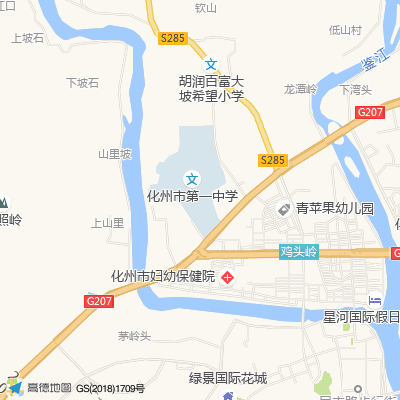

In [257]:
staticmap(location=化州一中_location,zoom=13)

## 坐标转换
* 为了使用高德服务，用户需要将非高德坐标转换为高德坐标。

In [282]:
def tranformation(locations:str,coordsys:str,sig=None)->dict:
    """坐标转换"""
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key': key_li,
        'locations':locations,
        'coordsys':coordsys,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

tranformation("101.703979,25.048668|120.7038889,25.048668",'gps')

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '101.705506456164,25.045691731771;120.707760959202,25.045863715278'}

## 天气查询
* 需要使用相关天气查询的时候。

In [284]:
def weather(city,extensions='all')->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key': key_li,
        'extensions':extensions,
        'city':city,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
weather(city='东莞')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'forecasts': [{'city': '东莞市',
   'adcode': '441900',
   'province': '广东',
   'reporttime': '2020-04-23 00:22:45',
   'casts': [{'date': '2020-04-22',
     'week': '3',
     'dayweather': '小雨',
     'nightweather': '阵雨',
     'daytemp': '21',
     'nighttemp': '17',
     'daywind': '无风向',
     'nightwind': '无风向',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-23',
     'week': '4',
     'dayweather': '阵雨',
     'nightweather': '阵雨',
     'daytemp': '20',
     'nighttemp': '16',
     'daywind': '无风向',
     'nightwind': '无风向',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-24',
     'week': '5',
     'dayweather': '中雨',
     'nightweather': '阵雨',
     'daytemp': '16',
     'nighttemp': '15',
     'daywind': '无风向',
     'nightwind': '无风向',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-25',
     'week': '6',
     'dayweather': '阴',
     'nightweather'

## 输入提示
* 在高德客户端的使用场景，输入关键字之后出现提示相关。

In [290]:
def entering(keywords,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key': key_li,
        'keywords':keywords,
        'output':'json'
     
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
entering(keywords='嘉荣')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B03017UOHR',
   'name': '嘉荣购物广场(寮步店)',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '113.882708,22.989334',
   'address': '红荔路10号景泰香都城2-3层',
   'typecode': '060102',
   'city': []},
  {'id': 'B03017TVXS',
   'name': '嘉荣购物广场',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '113.938791,22.93478',
   'address': '大朗镇美景大道大朗市场2层',
   'typecode': '060102',
   'city': []},
  {'id': 'B02F503IVT',
   'name': '嘉荣',
   'district': '广东省佛山市南海区',
   'adcode': '440605',
   'location': '113.021772,23.083095',
   'address': '万升金属制品厂附近',
   'typecode': '070000',
   'city': []},
  {'id': 'B073C03X3L',
   'name': '嘉荣',
   'district': '香港特别行政区深水埗区',
   'adcode': '810006',
   'location': '114.164781,22.328382',
   'address': '钦洲街37号西九龙购物中心6层606',
   'typecode': '170207',
   'city': []},
  {'id': 'B03017TV5L',
   'name': '嘉荣购物广场(东泰店)',
   'district': '广东省东莞市',
   'adcode': '441900',
   'loc

## 交通态势
* 希望能够确定矩形、圆形或某条道路的交通态势情况，路况信息2分钟更新一次。

In [297]:
def traffic_situation(rectangle,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key': key_li,
        'rectangle':rectangle,
        'output':'json'
             
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
traffic_situation(rectangle='116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '91.67%',
   'congested': '8.33%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

## 地理围栏

### 创建地理围栏

In [389]:
def create(name,center,radius,repeat="Sun",time=None,desc=None):
    """创建地理围栏"""
    url = "http://restapi.amap.com/v4/geofence/meta?key=c9bf0947fe23ac783fca0048cb0302b7"
    params = {
    "name":name,
    "center":center,
    "radius":radius,
    "repeat":repeat,
    "time":time,
    "desc":desc
    }
    response = requests.post(url,json=params)#{'data': {'gid': 'de90e05b-291c-4ad2-aa39-d5cb165cf3c6', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK'}
    data = response.json()
    return data#字符串类型
create('围栏',"119.672126,38.817129",50)

{'data': {'gid': 'e3dbb579-f7d9-4c23-9668-3ae9ccd36d76',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 查询围栏

In [390]:
def qury(id,name=None):
    url = "http://restapi.amap.com/v4/geofence/meta?key=c9bf0947fe23ac783fca0048cb0302b7"
    params = {
    "id":id,
    "name":name
    }
    response = requests.get(url,json=params)#{'data': {'gid': 'de90e05b-291c-4ad2-aa39-d5cb165cf3c6', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK'}
    data = response.json()
    return data#字符串类型
qury('0')

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': '',
    'center': '125.827784,28.248466',
    'create_time': '2020-04-23 01:15:27',
    'enable': True,
    'fixed_date': '',
    'gid': 'bc392930-0f8e-4581-a8db-97f0f9369b7e',
    'id': '0',
    'key': 'c9bf0947fe23ac783fca0048cb0302b7',
    'name': '围栏',
    'points': '',
    'radius': 50.0,
    'repeat': 'Sun',
    'time': '00:00,23:59',
    'valid_time': '2020-07-22'},
   {'adcode': '0',
    'alert_condition': '',
    'center': '115.672126,38.817129',
    'create_time': '2020-04-23 01:17:33',
    'enable': True,
    'fixed_date': '',
    'gid': 'dc57e26b-b800-482e-b58e-5019df283a0c',
    'id': '0',
    'key': 'c9bf0947fe23ac783fca0048cb0302b7',
    'name': '围栏',
    'points': '',
    'radius': 50.0,
    'repeat': 'Sun',
    'time': '00:00,23:59',
    'valid_time': '2020-07-22'},
   {'adcode': '0',
    'alert_condition': '',
    'center': '128.887784,28.248466',
    'create_time': '2020-0

### 更新围栏

In [394]:
def updata(name,center,radius=100,repeat="Mon"):
    key = 'https://restapi.amap.com/v4/geofence/meta?key=c9bf0947fe23ac783fca0048cb0302b7&gid=gid'
    params = {
    "name":name,
    "center":center,
    "radius":radius,
    "repeat":repeat,
    }
    response = requests.post(key,json=params)#{'data': {'gid': 'de90e05b-291c-4ad2-aa39-d5cb165cf3c6', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK'}
    data = response.json()
    return data#字符串类型
updata(name='围栏',center='116.828784,28.248466')

# 查询是否更新成功
qury('0')

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': '',
    'center': '125.827784,28.248466',
    'create_time': '2020-04-23 01:15:27',
    'enable': True,
    'fixed_date': '',
    'gid': 'bc392930-0f8e-4581-a8db-97f0f9369b7e',
    'id': '0',
    'key': 'c9bf0947fe23ac783fca0048cb0302b7',
    'name': '围栏',
    'points': '',
    'radius': 50.0,
    'repeat': 'Sun',
    'time': '00:00,23:59',
    'valid_time': '2020-07-22'},
   {'adcode': '0',
    'alert_condition': '',
    'center': '115.672126,38.817129',
    'create_time': '2020-04-23 01:17:33',
    'enable': True,
    'fixed_date': '',
    'gid': 'dc57e26b-b800-482e-b58e-5019df283a0c',
    'id': '0',
    'key': 'c9bf0947fe23ac783fca0048cb0302b7',
    'name': '围栏',
    'points': '',
    'radius': 50.0,
    'repeat': 'Sun',
    'time': '00:00,23:59',
    'valid_time': '2020-07-22'},
   {'adcode': '0',
    'alert_condition': '',
    'center': '128.887784,28.248466',
    'create_time': '2020-0

### 围栏启动&停止

In [405]:
def open(name,center,radius,repeat):
    parameters = {
    "name": name,
    "center":center,
    "radius": radius,
    "repeat": repeat,
    "enable":"true",#创建围栏后同时启动围栏
    }
    url = 'http://restapi.amap.com/v4/geofence/meta?key=c9bf0947fe23ac783fca0048cb0302b7&gid=gid'
    response = requests.post(url, json=parameters)#{'data': {'gid': 'de90e05b-291c-4ad2-aa39-d5cb165cf3c6', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK'}
    data = response.json()
    return data
open("围栏_","128.887784,28.248466",50,"Mon,Tues,Wed,Thur,Fri,Sat,Sun")

{'data': {'message': '新增围栏已存在', 'status': '106'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 删除围栏

In [406]:
def delete(name,center):
    parameters = {
    "name": name,
    "center":center,
    }
    url = 'https://restapi.amap.com/v4/geofence/meta?key=c9bf0947fe23ac783fca0048cb0302b7&gid=gid'
    response = requests.post(url, json=parameters)#{'data': {'gid': 'de90e05b-291c-4ad2-aa39-d5cb165cf3c6', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK'}
    data = response.json()
    return data
delete("围栏_","126.887784,28.248466")

{'data': {'message': '必选参数radius不存在', 'status': '143'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 轨迹纠偏
* 用于将行车产生的轨迹坐标点匹配到道路上。

In [354]:
url="https://restapi.amap.com/v4/grasproad/driving?key=c9bf0947fe23ac783fca0048cb0302b7"
def Trajectory_correction():
    body=[{
    "x": 116.4494449,
    "y": 40.012244,
    "sp": 3,
    "ag": 113,
    "tm": 1478831753
    }, {
    "x": 116.449739,
    "y": 40.011776,
    "sp": 3,
    "ag": 108,
    "tm": 23
    }, {
    "x": 116.4488859,
    "y": 40.014716,
    "sp": 3,
    "ag": 111,
    "tm": 30
    }, {
    "x": 116.4544474,
    "y": 40.0133358,
    "sp": 3,
    "ag": 111,
    "tm": 31
    }, {
    "x": 116.422273,
    "y": 40.022298,
    "sp": 3,
    "ag": 111,
    "tm": 20
    }]

    r=requests.post(url=url,json=body).json()
    return r
Trajectory_correction()

{'data': {'distance': 3238.0,
  'points': [{'x': 116.44975931632827, 'y': 40.0122682195117},
   {'x': 116.44976735115051, 'y': 40.01220703125},
   {'x': 116.44986927509308, 'y': 40.01141309738159},
   {'x': 116.44993901252747, 'y': 40.01104295253754},
   {'x': 116.44992291927338, 'y': 40.01041531562805},
   {'x': 116.44986391067505, 'y': 40.00977694988251},
   {'x': 116.44986391067505, 'y': 40.0092351436615},
   {'x': 116.44984245300293, 'y': 40.009052753448486},
   {'x': 116.4295220375061, 'y': 40.02216339111328},
   {'x': 116.42227281537524, 'y': 40.02229189199458}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 尝试简单应用

应用名称：即兴出游APP


想法来源：有时候突然想出去玩，但是又没有提前做好攻略，纠结去哪里玩，又怕塞车，也怕天气突然不好……但是很想出去玩的心情很迫切。所以就想要是有一款APP可以给我推荐地点，根据路线是否塞车、根据预测天气给我推荐室内场地还是室外场地、根据人流密集的程度……排除一部分地点，从而选择出最优的即兴出行方案。

应用必须具备的功能：
* 路径规划。
* 天气查询。
* 周边搜索。
* 轨迹纠偏。